In [3]:
!pip install transformers
!pip install sentencepiece

In [4]:
from transformers.pipelines import SUPPORTED_TASKS


## 查看 pipeline 任務

| 英文名稱                         | 繁體中文名稱               |
|---------------------------------|-------------------------|
| audio-classification            | 音訊分類                  |
| automatic-speech-recognition    | 自動語音識別              |
| text-to-audio                   | 文字轉音訊                |
| feature-extraction              | 特徵提取                  |
| text-classification             | 文字分類                  |
| token-classification            | 標記分類                  |
| question-answering              | 問答                      |
| table-question-answering        | 表格問答                  |
| visual-question-answering       | 視覺問答                  |
| document-question-answering     | 文件問答                  |
| fill-mask                       | 填充遮蔽                  |
| summarization                   | 摘要                      |
| translation                     | 翻譯                      |
| text2text-generation            | 文字到文字生成             |
| text-generation                 | 文字生成                  |
| zero-shot-classification        | 零樣本分類                |
| zero-shot-image-classification  | 零樣本圖像分類             |
| zero-shot-audio-classification  | 零樣本音訊分類             |
| conversational                  | 對話                      |
| image-classification            | 圖像分類                  |
| image-segmentation              | 圖像分割                  |
| image-to-text                   | 圖像到文字                |
| object-detection                | 物體檢測                  |
| zero-shot-object-detection      | 零樣本物體檢測             |
| depth-estimation                | 深度估計                  |
| video-classification            | 影片分類                  |
| mask-generation                 | 遮罩生成                  |
| image-to-image                  | 圖像到圖像                |


In [5]:
print("pipline 支援的任務如下", end="\n\n")
for k, v in SUPPORTED_TASKS.items():
    print(k)


pipline 支援的任務如下

audio-classification
automatic-speech-recognition
text-to-audio
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
visual-question-answering
document-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
zero-shot-image-classification
zero-shot-audio-classification
conversational
image-classification
image-segmentation
image-to-text
object-detection
zero-shot-object-detection
depth-estimation
video-classification
mask-generation
image-to-image


## 確認環境配置
## GPU 狀態

In [6]:
## 確認環境配置
## GPU 狀態

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Sun Jan  7 08:22:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## pipeline 建立

In [8]:
from transformers import pipeline


In [9]:
##　根據任務類型建立相關 pipeline
## 默認屬於英文類型

pipe = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [10]:
pipe("this is good! ")

[{'label': 'POSITIVE', 'score': 0.9998394250869751}]

In [13]:
## 查看模型物件
help(pipeline.text_classification.TextClassificationPipeline)


AttributeError: 'function' object has no attribute 'text'

## pipeline 建立 - 指定中文模型

In [14]:
pipe_v2 = pipeline("sentiment-analysis", model = "uer/roberta-base-finetuned-chinanews-chinese")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [15]:
pipe_v2("中國宣布開放兩岸邊境")

[{'label': 'Hong Kong - Macau politics', 'score': 0.6763496398925781}]

## pipeline 建立 - 分段下載模型 (model, tokenizer)

In [16]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [17]:
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-chinanews-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-chinanews-chinese")
pipe_v3 = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)


In [18]:
pipe_v3("中國宣布開放兩岸邊境")

[{'label': 'Hong Kong - Macau politics', 'score': 0.6763496398925781}]

## 效能比較 CPU vs GPU

In [ ]:
pipe = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english', device=device)


In [ ]:
import torch
import time
# 檢查 CUDA (GPU) 是否可用
if torch.cuda.is_available():
    print("CUDA is available. Using GPU for inference.")
    device = 0  # 如果有多個 GPU，您可以選擇 0, 1, 2, ...
else:
    print("CUDA is not available. Using CPU for inference.")
    device = -1  # 使用 CPU

# 創建一個 pipeline，示例中假設是一個文本生成的 pipeline
# 記得選擇正確的模型和任務類型



# 指定 CPU, device = -1
device = -1
pipe = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english', device=device)
CPU_times = []

for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("this is good! ")
    torch.cuda.synchronize()
    end = time.time()
    CPU_times.append(end - start)


# 指定 CPU, device = 0
device = 0
pipe = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english', device=device)
GPU_times = []

for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("this is good! ")
    torch.cuda.synchronize()
    end = time.time()
    GPU_times.append(end - start)


## 計算平均耗時
print("CPU平均耗費時間: ", sum(CPU_times) / 100)
print("GPU平均耗費時間: ", sum(GPU_times) / 100)
print("耗時比: ", (sum(CPU_times) / 100)/ (sum(GPU_times) / 100))



loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/4643665f84c6760e3cbf6adaace6c398592270af/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.35.2",
  "vocab_size": 30522
}

loading configuration file config

CUDA is available. Using GPU for inference.


All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/4643665f84c6760e3cbf6adaace6c398592270af/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initi

CPU平均耗費時間:  0.05935314178466797
GPU平均耗費時間:  0.010019044876098632
耗時比:  5.924031933049869


## pipeline 參數解說 - QA 任務為例

In [ ]:
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")

In [ ]:
qa_pipe.model.device

device(type='cpu')

In [ ]:
qa_pipe

In [ ]:
help(QuestionAnsweringPipeline)

In [ ]:
question = "誰是威廉·莎士比亞的妻子？"
article = """威廉·莎士比亞（William Shakespeare）是一位著名的文學家和劇作家
，被認為是英國文學史上最偉大的作家之一。他的妻子名叫安妮·海瑟薇（Anne Hathaway），兩人於1582年結婚。"""

qa_pipe(question=question, context=article, max_answer_len=10)

Disabling tokenizer parallelism, we're using DataLoader multithreading already


{'score': 0.7449873089790344, 'start': 68, 'end': 74, 'answer': '安妮·海瑟薇'}

## 其他 pipeline 案例 - 圖像辨識

In [19]:
model = "google/owlvit-base-patch32"
detector = pipeline(task="zero-shot-object-detection", model=model, device=0)

config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
detector

In [ ]:
ZeroShotObjectDetectionPipeline

transformers.pipelines.zero_shot_object_detection.ZeroShotObjectDetectionPipeline

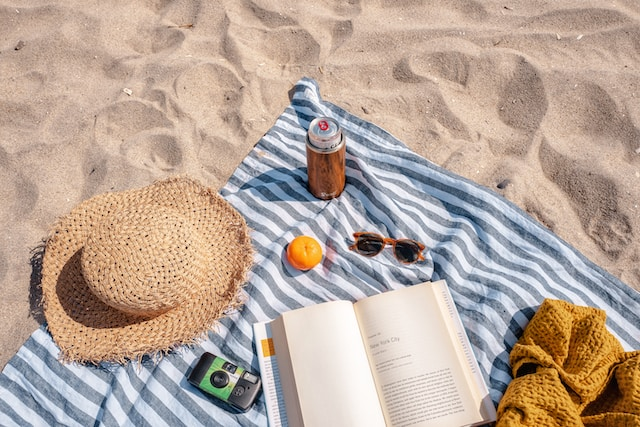

In [20]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
img = Image.open(requests.get(url, stream=True).raw)
img

In [ ]:
predictions = detector(
    img,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions

[{'score': 0.22562037408351898,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 429, 'ymax': 265}},
 {'score': 0.1573874056339264,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 503, 'ymax': 427}},
 {'score': 0.10808248817920685,
  'label': 'hat',
  'box': {'xmin': 38, 'ymin': 172, 'xmax': 260, 'ymax': 363}}]

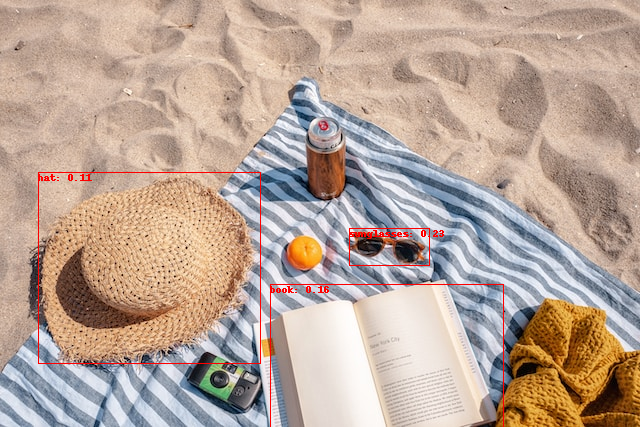

In [ ]:
from PIL import ImageDraw

draw = ImageDraw.Draw(img)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

img


## Pipeline 執行過程解析

In [ ]:
from transformers import pipeline
import torch


In [ ]:

# 下載切詞器, 模型
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)


All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at uer/roberta-base-finetuned-dianping-chinese.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [ ]:
# 定義輸入文本, 並用切詞器轉 mapping 為數字序列
input_text = "這家素食餐廳很好吃"
inputs = tokenizer(input_text, return_tensors='pt')

for k, v in inputs.items():
    print(k, v)

    '''
    @input_ids:
    這是一個包含數字的 tensor，每個數字都是輸入文本中一個詞或符號的唯一 ID。
    這些 ID 是根據模型使用的詞彙表轉換而來的。例如，在 BERT 模型中，每個詞都被轉換成一個唯一的 ID。
    在您提供的例子中，[ 101, 2769, 6221, ... ] 是轉換後的詞 ID 序列。

    @token_type_ids:
    這個 tensor 用於區分輸入中的不同序列。這在處理像是「問題+答案」這樣的成對輸入時特別有用。
    通常情況下，第一序列的 token 會被標記為 0，第二序列的 token 會被標記為 1。
    在您的例子中，所有的 token 都被標記為 0，表示這可能是單序列輸入。

    @attention_mask:
    這個 tensor 用於指示哪些 token 是有意義的，哪些是填充（padding）的。
    在 Transformer 模型中，由於輸入序列的長度需要固定，不足的部分會用特殊的符號（通常是 [PAD]）填充。attention_mask 用 1 和 0 標記哪些 token 是真實的，哪些是填充的。
    在您的例子中，所有的 token 都被標記為 1，表示沒有填充的 token。

    '''

input_ids tensor([[ 101, 6857, 2157, 5162, 7608, 7623, 2453, 2523, 1962, 1391,  102]])
token_type_ids tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [ ]:
# 模型預測出邏輯值
response = model(**inputs)
response

SequenceClassifierOutput(loss=None, logits=tensor([[-1.6838,  1.7066]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
# 邏輯值轉換為機率輸出
logits = response.logits
logits = torch.softmax(logits, dim=-1)
logits

tensor([[0.0326, 0.9674]], grad_fn=<SoftmaxBackward0>)

In [ ]:
# 返回最大類別的標籤
pred = torch.argmax(logits).item()
pred

1

In [ ]:
# config 中的 id2lable 可以看到模型的輸出的index 對應真實的 label
model.config

BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [ ]:
model.config.id2label[pred]

'positive (stars 4 and 5)'